#### Dataset

In [3]:
# DailyDelhiClimateTrain.csv
# DailyDelhiClimateTest.csv
# https://mitu.co.in/dataset

#### Load the libraries

In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler

#### Load the data

In [8]:
train_df = pd.read_csv('datasets/DailyDelhiClimateTrain.csv')
test_df = pd.read_csv('datasets/DailyDelhiClimateTest.csv')

In [9]:
train_df.shape

(1462, 5)

In [10]:
test_df.shape

(114, 5)

In [11]:
train_df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [12]:
train_df['date']

0       2013-01-01
1       2013-01-02
2       2013-01-03
3       2013-01-04
4       2013-01-05
           ...    
1457    2016-12-28
1458    2016-12-29
1459    2016-12-30
1460    2016-12-31
1461    2017-01-01
Name: date, Length: 1462, dtype: object

In [16]:
t2015 = train_df[train_df['date'].str.startswith('2015')]

In [17]:
t2015.shape

(365, 5)

In [18]:
t2015

,date,meantemp,humidity,wind_speed,meanpressure
730,2015-01-01,14.750,72.000,0.9250,1017.500
731,2015-01-02,14.875,96.625,3.0125,1017.875
732,2015-01-03,15.125,92.000,0.9250,1017.375
733,2015-01-04,14.125,78.750,9.5125,1019.625
734,2015-01-05,14.000,69.375,15.0500,1016.000
...,...,...,...,...,...
1090,2015-12-27,15.375,63.250,7.8875,1020.625
1091,2015-12-28,17.125,58.125,10.8875,1020.875
1092,2015-12-29,16.375,65.000,7.4125,1018.125
1093,2015-12-30,15.500,71.750,2.1000,1017.500


In [19]:
t2015['meantemp'].mean()

25.114591487279846

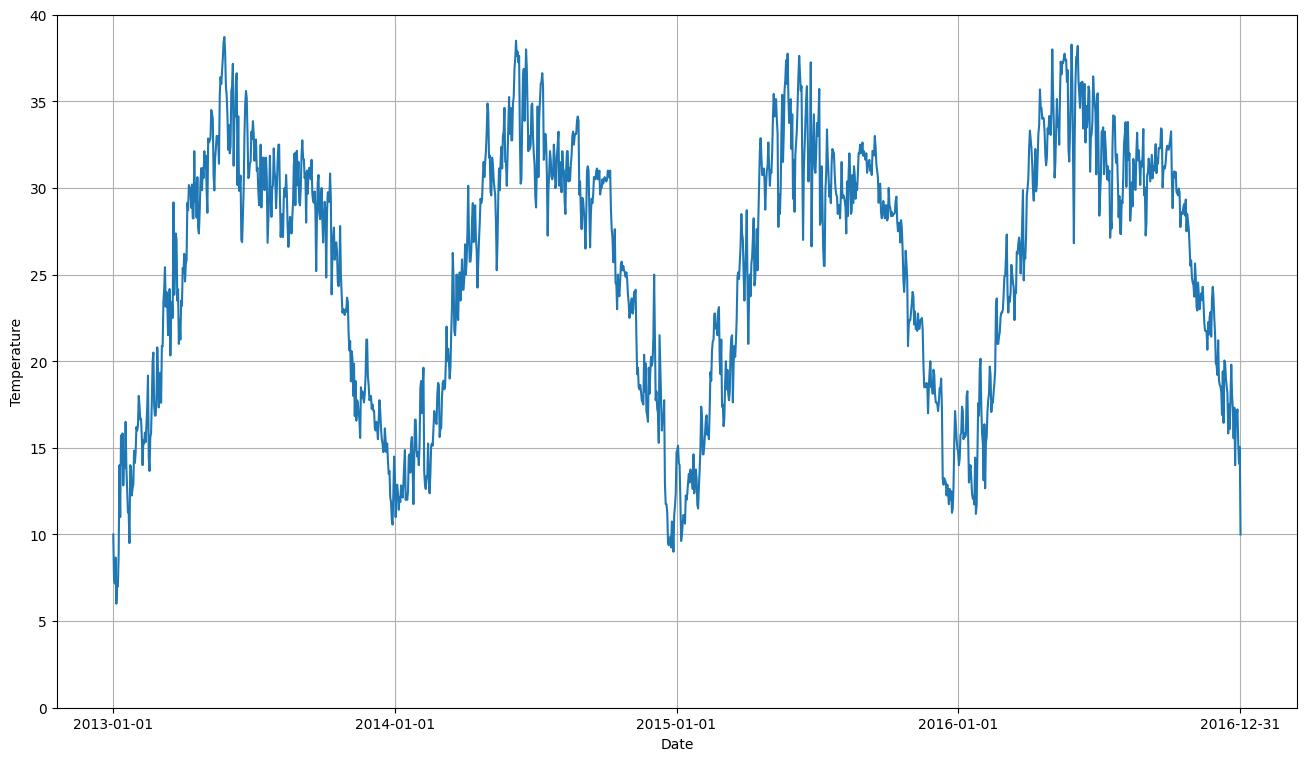

In [24]:
plt.figure(figsize=(16,9))
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.ylim(0,40)
plt.grid()
plt.xticks(range(0,1500,365))
plt.plot(train_df['date'], train_df['meantemp'])

#### Prepare the input data

In [33]:
train_data = train_df[['meantemp']].values
test_data = test_df[['meantemp']].values

In [34]:
train_data.shape

(1462, 1)

#### Feature Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [40]:
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data)- seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

In [43]:
seq_length = 30
x_train, y_train = create_sequences(train_scaled, seq_length)
x_test, y_test = create_sequences(test_scaled, seq_length)

In [46]:
x_train.shape, y_train.shape

((1432, 30, 1), (1432, 1))

In [47]:
x_test.shape, y_test.shape

((84, 30, 1), (84, 1))

#### Build the model

In [53]:
model = Sequential()

model.add(Input((seq_length,1)))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(32))
model.add(Dropout(0.2))

model.add(Dense(1))

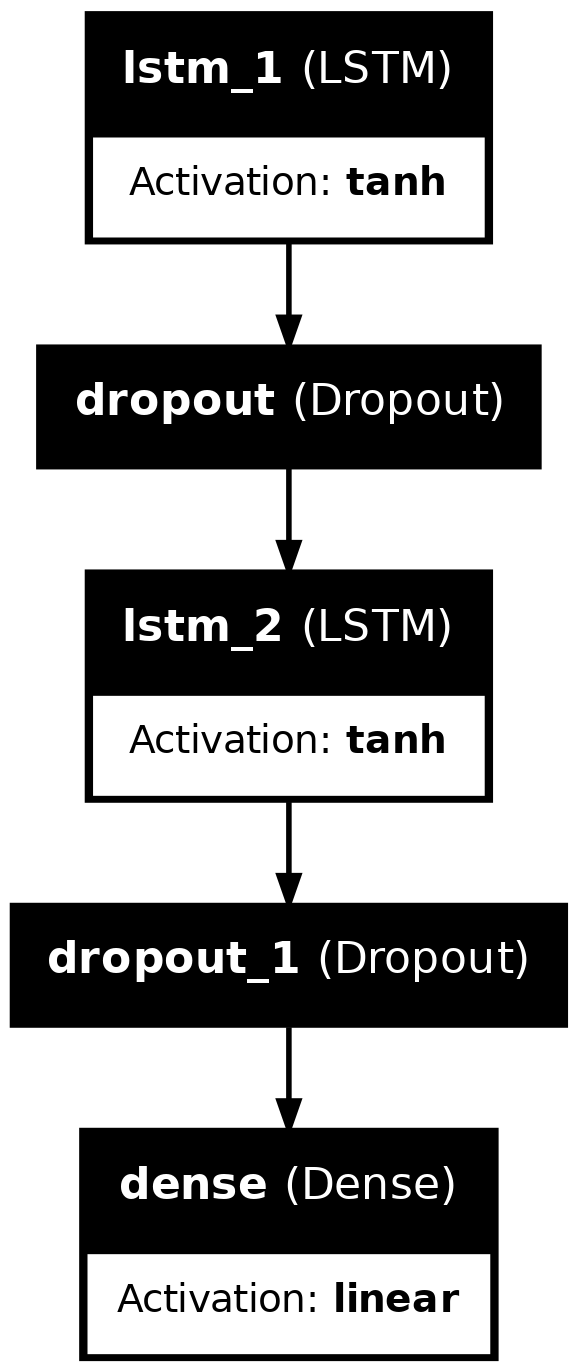

In [55]:
from keras.utils import plot_model
plot_model(model, show_layer_names=True, show_layer_activations=True)

#### Compile The model

In [58]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

#### Train the model

In [60]:
model.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0339 - mae: 0.1324
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0116 - mae: 0.0835
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0104 - mae: 0.0813
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0091 - mae: 0.0727
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0079 - mae: 0.0688
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0085 - mae: 0.0717
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0082 - mae: 0.0709
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0073 - mae: 0.0672
Epoch 9/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0072 - mae: 0.0676
Epoch 10/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0066 - mae: 0.0635
Epoch 11/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0063 - mae: 0.0626
Epoch 12/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0063 - mae: 0.0619
Epoch 13/20
1

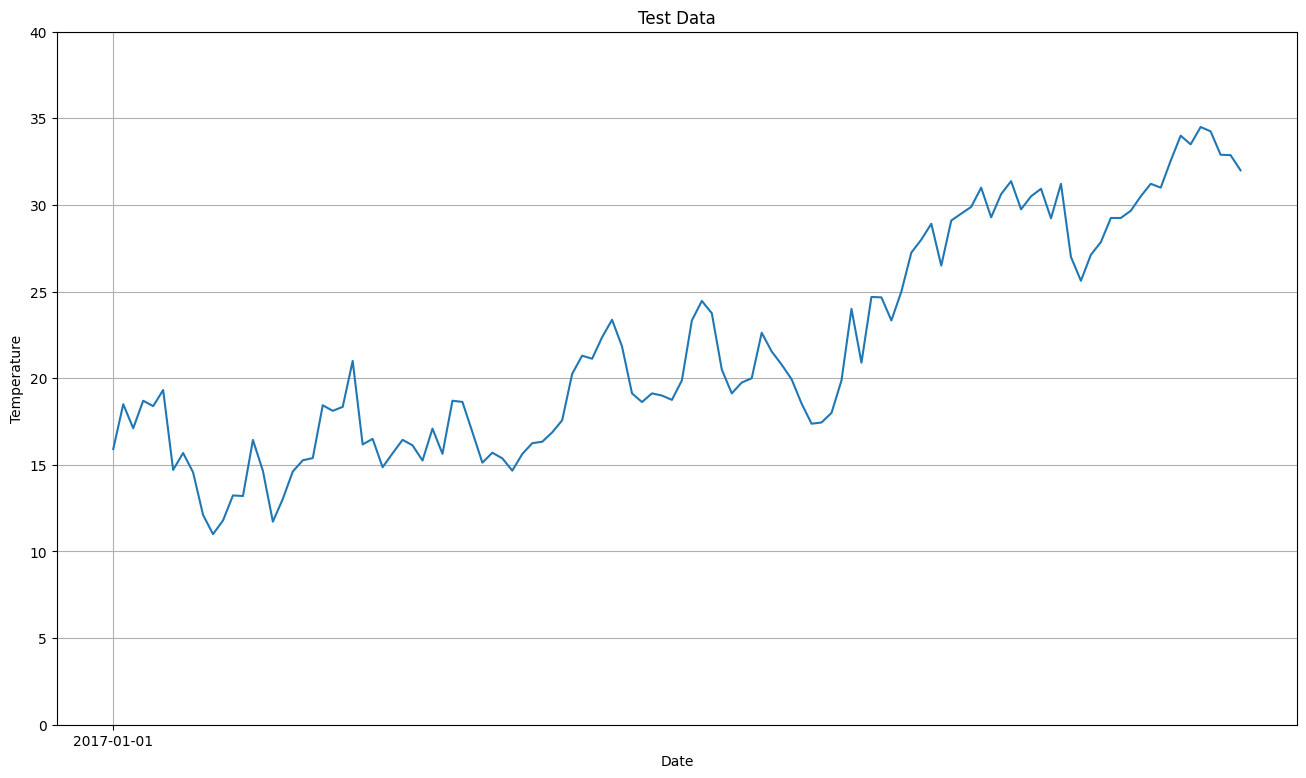

In [62]:
plt.figure(figsize=(16,9))
plt.title("Test Data")
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.ylim(0,40)
plt.grid()
plt.xticks(range(0,1500,365))
plt.plot(test_df['date'], test_df['meantemp'])

#### Predict the temperature on test dataset

In [65]:
predictions = model.predict(x_test, batch_size=1)

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [66]:
predictions_new = scaler.inverse_transform(predictions)

In [68]:
predictions_new.shape

(84, 1)

In [69]:
actual = scaler.inverse_transform(y_test)

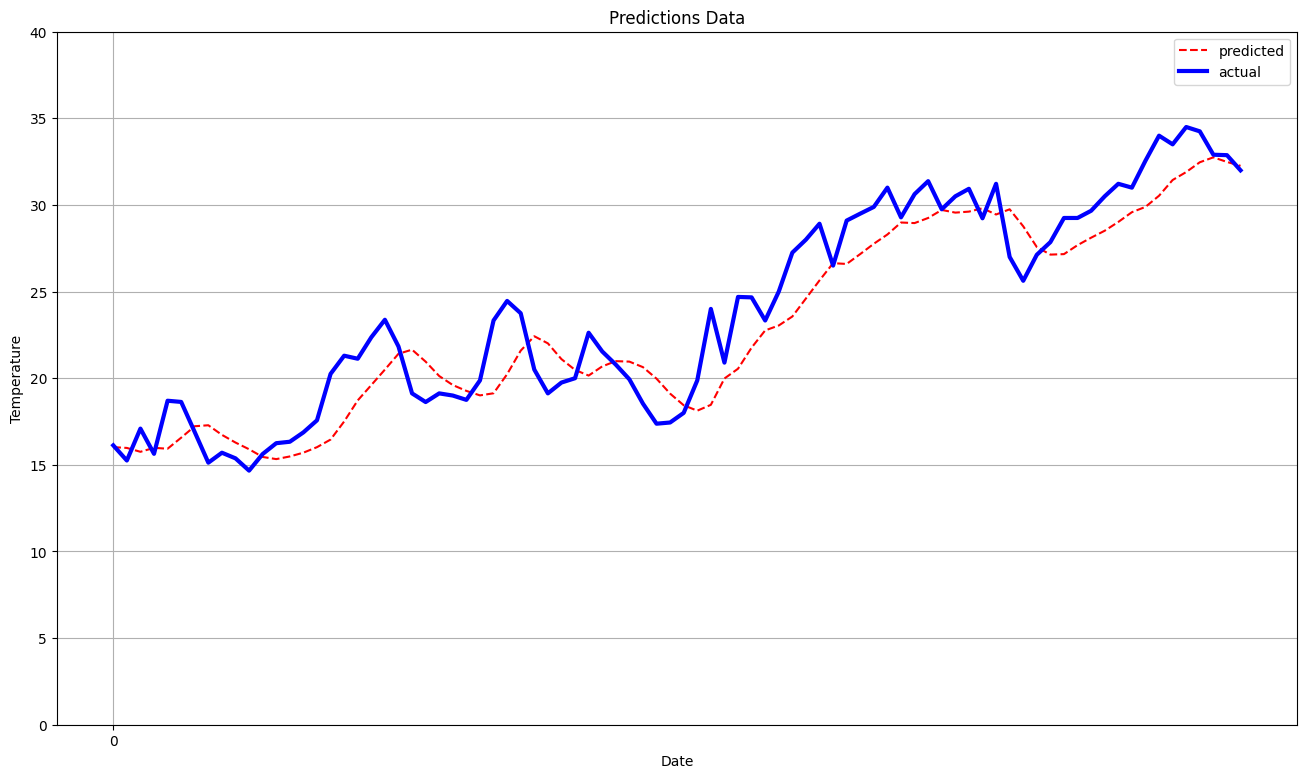

In [74]:
plt.figure(figsize=(16,9))
plt.title("Predictions Data")
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.ylim(0,40)
plt.grid()
plt.xticks(range(0,1500,365))
plt.plot(predictions_new, color = 'red', ls = '--', label='predicted')
plt.plot(actual, color = 'blue', lw = 3, label = 'actual')
plt.legend()